In [1]:
import numpy as np
import timeit
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from copy import deepcopy as copy
from typing import List, Tuple

# MCTS code imports
sys.path.append("..")  # Adds higher directory to python modules path.
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image, get_image_based_state
from main import MeasurementControlEnvironment
from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from utils import rotate_about_point
from exploration_grid import ExplorationGrid

### Create Game Environment and RL Wrapper (This initializes NN at random)

In [2]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment()
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)

Toy Measurement Control Initialized
Using device: cuda
Model loaded


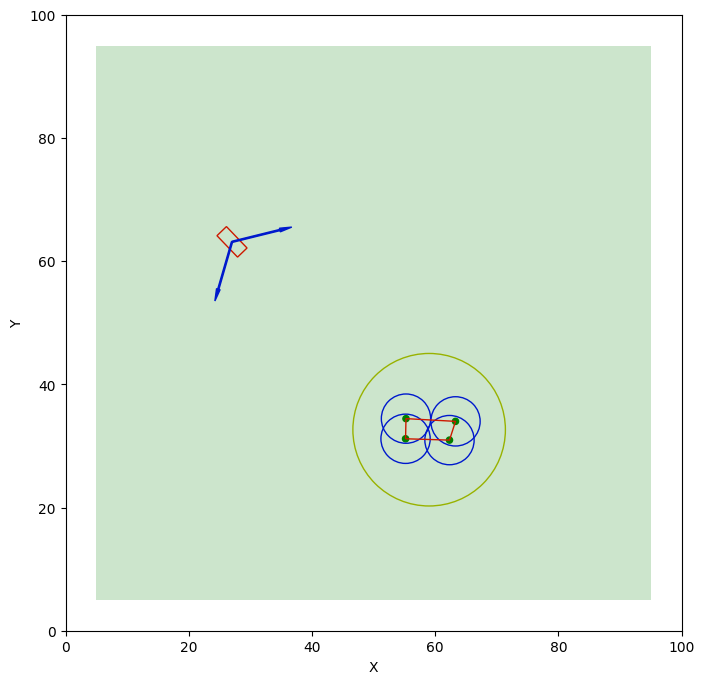

In [3]:
# Generate a random starting state and draw the grid and state
starting_state = env.reset()
env.draw_state(starting_state, explore_grid=True)

start time environment: 0.0009  
start time image state: 0.009

Outer points: [[28.17902499 61.8063705 ]
 [54.73004025 31.8890914 ]
 [67.36365634 69.84158465]
 [66.13151825 49.17275441]
 [15.5454089  23.85387724]
 [36.21423915 22.62173916]]
Time for environment step: 0.0042788549999386305
Time for image state generation: 0.00954063899916946
Outer points: [[29.30788078 60.10990195]
 [51.46702571 26.80866629]
 [69.2271693  62.64966655]
 [65.14888104 42.34975835]
 [11.54773719 24.26890168]
 [31.84764539 20.19061343]]
Time for environment step: 0.0013985549994686153
Time for image state generation: 0.009505519001322682
Outer points: [[29.9012713  57.88094932]
 [40.19163719 19.22725131]
 [68.52153867 47.46581858]
 [58.13983858 29.55104783]
 [ 1.57136982 29.64238205]
 [19.48614057 19.26068195]]
Time for environment step: 0.0014962139994167956
Time for image state generation: 0.009643358000175795
Outer points: [[ 28.86076302  55.52504619]
 [ 12.70034488  18.93487147]
 [ 52.46857478  23.23462618]
 [ 33.16051773  15.75681628]
 [-10.90746688  51.22529148]
 [

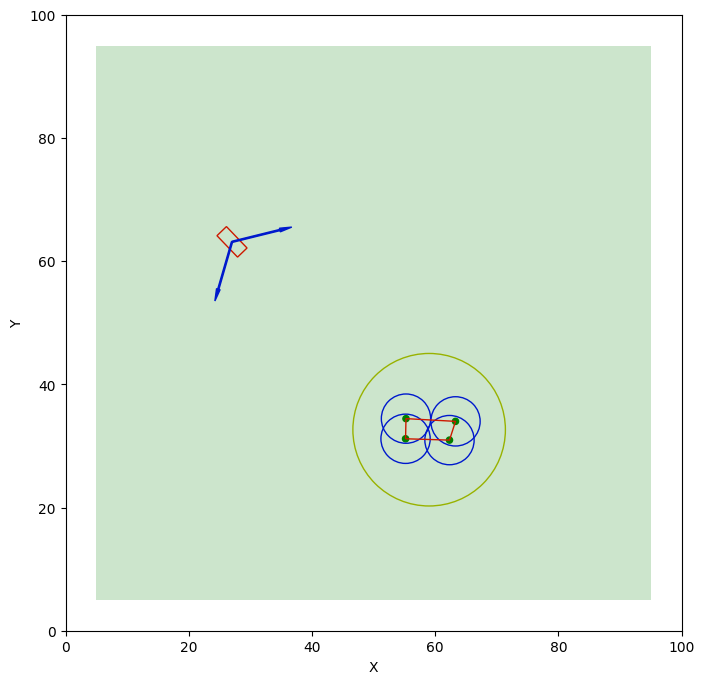

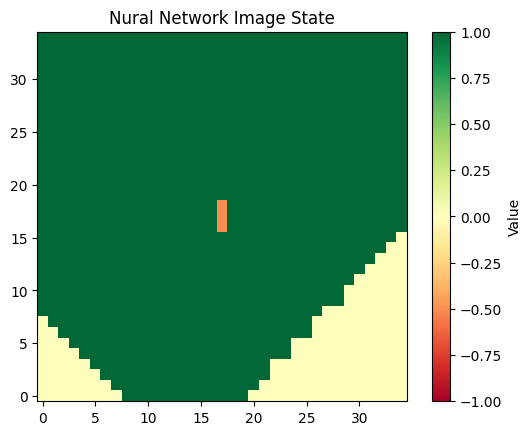

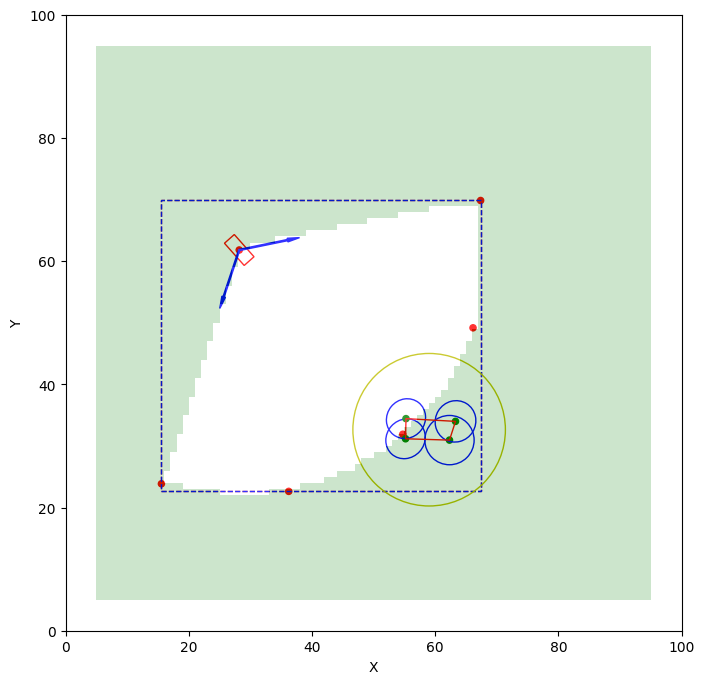

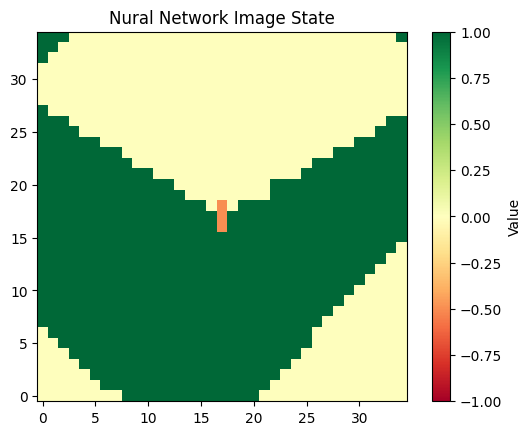

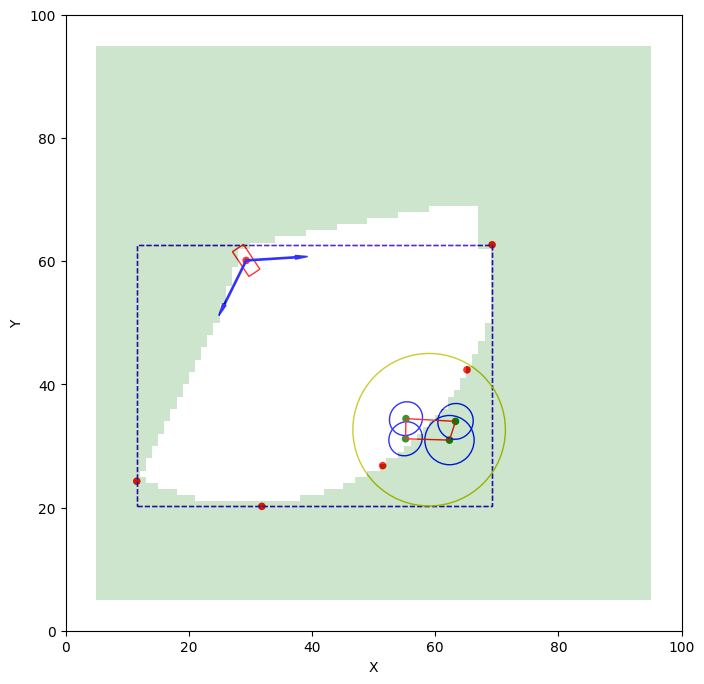

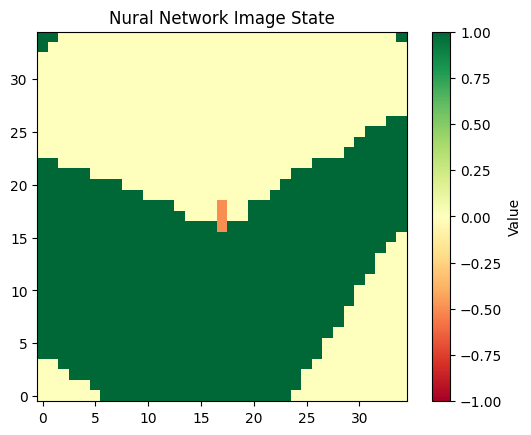

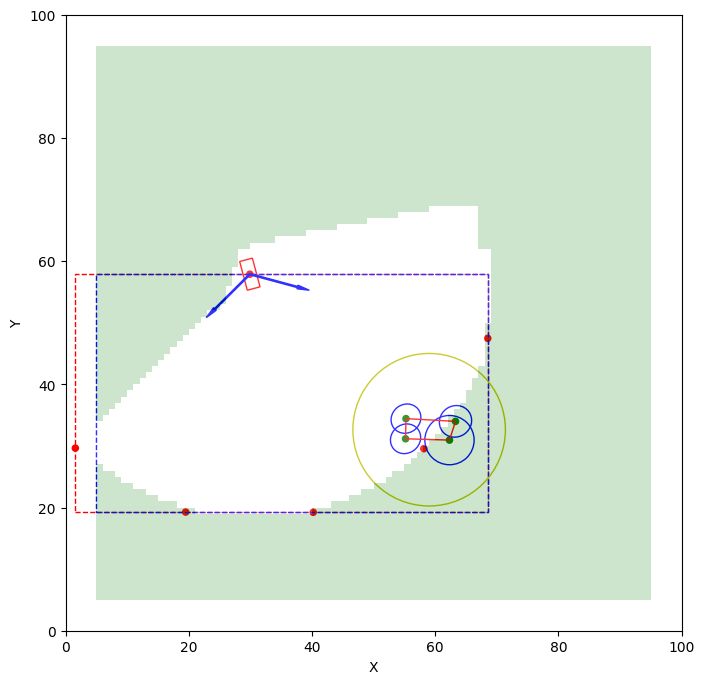

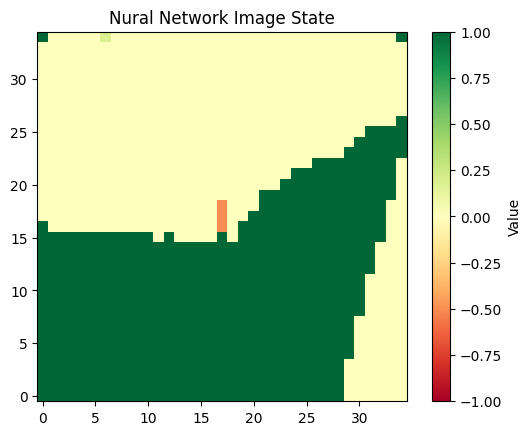

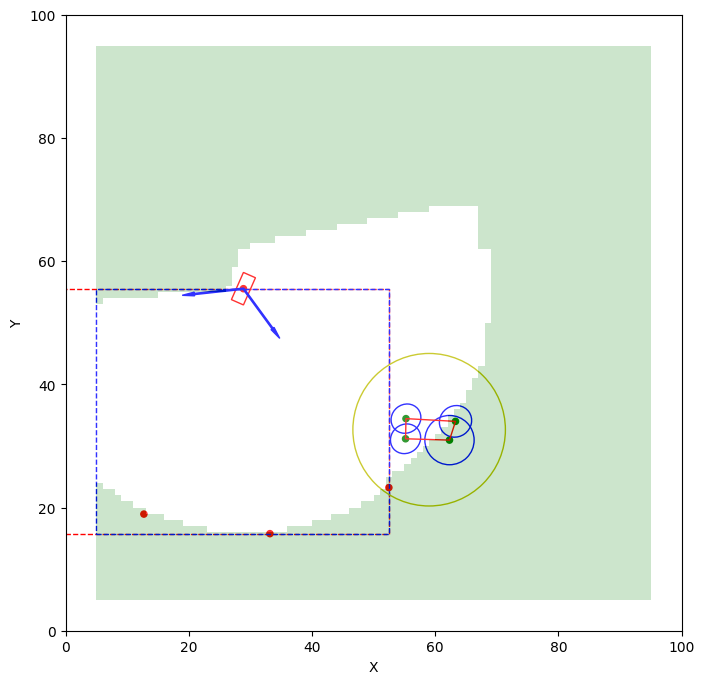

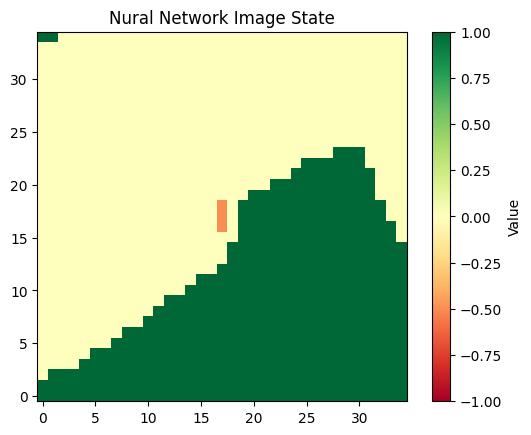

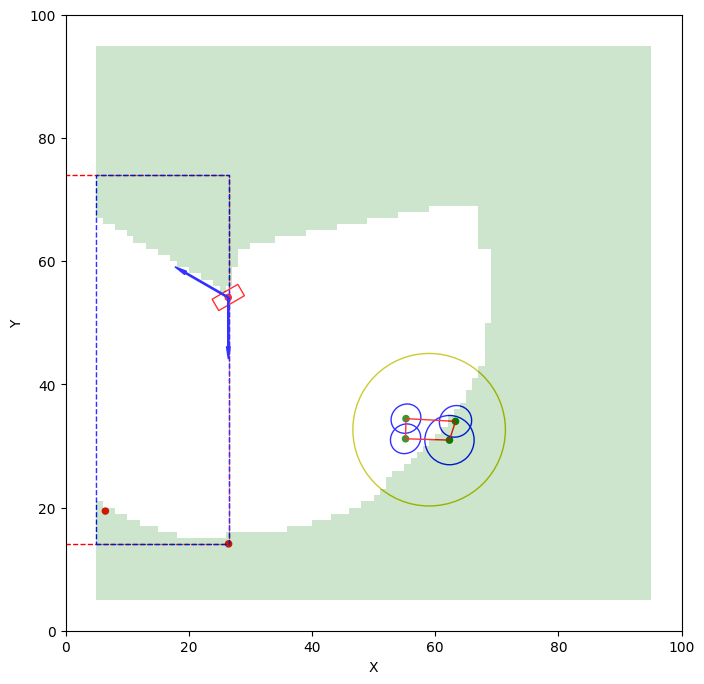

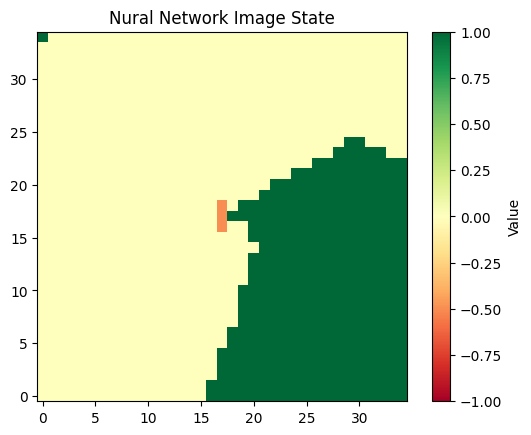

In [4]:
state = starting_state
state[0][2] = 5. # Set starting velocity if wanted

env.draw_state(state, explore_grid=True)
nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=env.explore_grid.grid, grid_origin=env.explore_grid.grid_origin, meters_per_pixel=env.explore_grid.meters_per_pixel)
plot_state_image(nn_image_state, 'Nural Network Image State')

for _ in range(5):
    start_time = timeit.default_timer()
    state, reward, done = env.step(state, [1., -1.])
    print("Time for environment step:", timeit.default_timer() - start_time)
    env.draw_state(state, explore_grid=True)
    start_time = timeit.default_timer()
    nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=env.explore_grid.grid, grid_origin=env.explore_grid.grid_origin, meters_per_pixel=env.explore_grid.meters_per_pixel)
    print("Time for image state generation:", timeit.default_timer() - start_time)
    plot_state_image(nn_image_state, 'Nural Network Image State')